In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pathlib import Path
DATA_DIR = Path('..')/'..'/'data'

# Loading data

In [2]:
house_polls = pd.read_pickle(DATA_DIR/'cleaned'/'HousePollwithWinner_Final.pkl')

In [8]:
house_polls.head()

,race_name,race_type,state,top_candidates,pollster,poll_results,poll_leader,poll_spread,date,winner,winning_party,election_date,district
0,pennsylvania 12th district special election,house,PA,"[burns, critz]",ppp (d),"{'burns': 44.0, 'critz': 41.0}",burns,3.0,2010-04-20,critz,d,2010-11-02 00:00:00,12
1,new hampshire 1st district,house,NH,"[guinta, shea-porter]",ppp (d),"{'guinta': 46.0, 'shea-porter': 45.0}",guinta,1.0,2010-04-22,guinta,r,2010-11-02 00:00:00,1
2,new hampshire 2nd district,house,NH,"[bass, swett]",ppp (d),"{'bass': 47.0, 'swett': 32.0}",bass,15.0,2010-04-22,bass,r,2010-11-02 00:00:00,2
3,new hampshire 1st district,house,NH,"[guinta, shea-porter]",wmur/unh,"{'guinta': 42.0, 'shea-porter': 38.0}",guinta,4.0,2010-04-30,guinta,r,2010-11-02 00:00:00,1
4,new hampshire 2nd district,house,NH,"[bass, swett]",wmur/unh,"{'bass': 44.0, 'swett': 27.0}",bass,17.0,2010-04-30,bass,r,2010-11-02 00:00:00,2


In [3]:
house_polls.iloc[400:500, :]

,race_name,race_type,state,top_candidates,pollster,poll_results,poll_leader,poll_spread,date,winner,winning_party,election_date,district
400,maine 2nd district,house,ME,"[poliquin, cain]",colby college/surveyusa,"{'poliquin': 50.0, 'cain': 45.0}",poliquin,5.0,2016-09-14,poliquin,r,2016-11-08 00:00:00,2
401,maine 1st district,house,ME,"[pingree, holbrook]",press herald/unh,"{'pingree': 64.0, 'holbrook': 22.0}",pingree,42.0,2016-09-25,pingree,d,2016-11-08 00:00:00,1
402,maine 2nd district,house,ME,"[poliquin, cain]",press herald/unh,"{'poliquin': 45.0, 'cain': 35.0}",poliquin,10.0,2016-09-25,poliquin,r,2016-11-08 00:00:00,2
403,iowa 1st district,house,IA,"[blum, vernon]",loras,"{'blum': 45.0, 'vernon': 38.0}",blum,7.0,2016-09-27,blum,r,2016-11-08 00:00:00,1
404,iowa 3rd district,house,IA,"[young, mowrer]",loras,"{'young': 46.0, 'mowrer': 36.0}",young,10.0,2016-09-27,young,r,2016-11-08 00:00:00,3
405,new york 1st district,house,NY,"[zeldin, throne-holst]",newsday/siena,"{'zeldin': 53.0, 'throne-holst': 38.0}",zeldin,15.0,2016-10-08,zeldin,r,2016-11-08 00:00:00,1
406,new york 3rd district,house,NY,"[suozzi, martins]",newsday/siena,"{'suozzi': 50.0, 'martins': 34.0}",suozzi,16.0,2016-10-08,suozzi,d,2016-11-08 00:00:00,3
407,florida 13th district,house,FL,"[crist, jolly]",univ. of north florida,"{'crist': 54.0, 'jolly': 36.0}",crist,18.0,2016-10-13,crist,d,2016-11-08 00:00:00,13
408,minnesota 2nd district,house,MN,"[craig, lewis]",kstp/surveyusa,"{'craig': 46.0, 'lewis': 41.0}",craig,5.0,2016-10-17,lewis,r,2016-11-08 00:00:00,2
409,minnesota 3rd district,house,MN,"[paulsen, bonoff]",kstp/surveyusa,"{'paulsen': 49.0, 'bonoff': 38.0}",paulsen,11.0,2016-10-17,paulsen,r,2016-11-08 00:00:00,3


In [10]:
house_polls = house_polls.replace("<BLANK>", np.nan)

# Feature extraction

Initial exploration will only occur on house data, then replicated on other datasets (senate, governor).

## What percent of poll leaders become winners?

Starting from very simple features. 

In [6]:
def find_winning_pct(party=None):
    """Find winning percentage for a party, or if not specified, overall."""
    if not party:
        winning_pct = (house_polls['poll_leader'] == house_polls['winner']).mean()
    else:
        subset = house_polls[house_polls['winning_party'] == party]
        winning_pct = (subset['poll_leader'] == subset['winner']).mean()
    return round(winning_pct * 100, 2)

In [7]:
print(f"{find_winning_pct()}% of poll leaders become winners")

45.64% of poll leaders become winners


Does winning party play a role in this?

In [7]:
print(f"{find_winning_pct('r')}% of winning republicans had led the polls")

68.54% of winning republicans had led the polls


In [8]:
print(f"{find_winning_pct('d')}% of winning democrats had led the polls")

68.85% of winning democrats had led the polls


## Poll Spread

In [16]:
result_win = house_polls[house_polls['poll_leader'] == house_polls['winner']]
result_lose = house_polls[house_polls['poll_leader'] != house_polls['winner']]

In [17]:
pd.DataFrame({
    'result_win': result_win['poll_spread'].describe(),
    'result_lose': result_lose['poll_spread'].describe()
})

,result_win,result_lose
count,309.000000,340.000000
mean,9.025890,6.494118
std,6.747725,5.237990
min,1.000000,1.000000
25%,4.000000,3.000000
50%,7.000000,5.000000
75%,13.000000,9.000000
max,42.000000,28.000000


/mnt/c/Users/Junseo/Dropbox/4thYear/1Fall/ieor135/tenguins/.env/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/c/Users/Junseo/Dropbox/4thYear/1Fall/ieor135/tenguins/.env/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


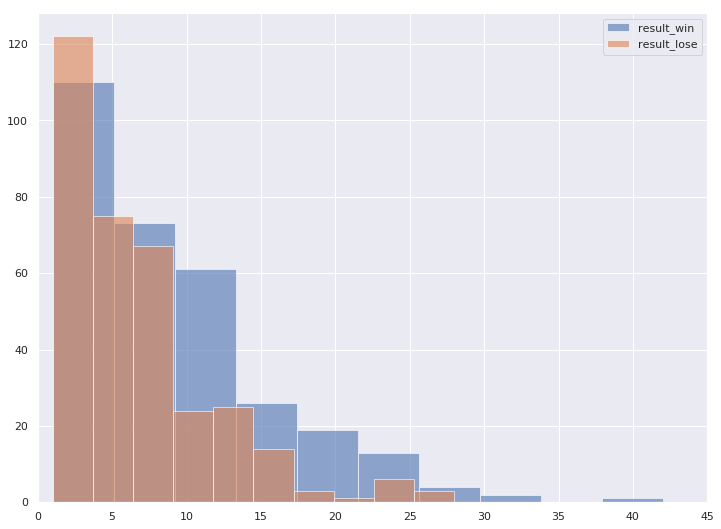

In [11]:
plt.figure(figsize=(12, 9))
plt.hist(result_win['poll_spread'], label='result_win', alpha=0.6)
plt.hist(result_lose['poll_spread'], label='result_lose', alpha=0.6)
plt.xlim(0, 45)
plt.legend();

Does this depend on party?

In [12]:
result_win_r = result_win[result_win['winning_party'] == 'r'] # republican led poll and won
result_win_d = result_win[result_win['winning_party'] == 'd'] # democrat led poll and won
result_win_nan = result_win[result_win['winning_party'].isnull()]

result_lose_r = result_lose[result_lose['winning_party'] == 'r'] # republican lost poll but won
result_lose_d = result_lose[result_lose['winning_party'] == 'd'] # democrat lost poll but won
result_lose_nan = result_lose[result_lose['winning_party'].isnull()]

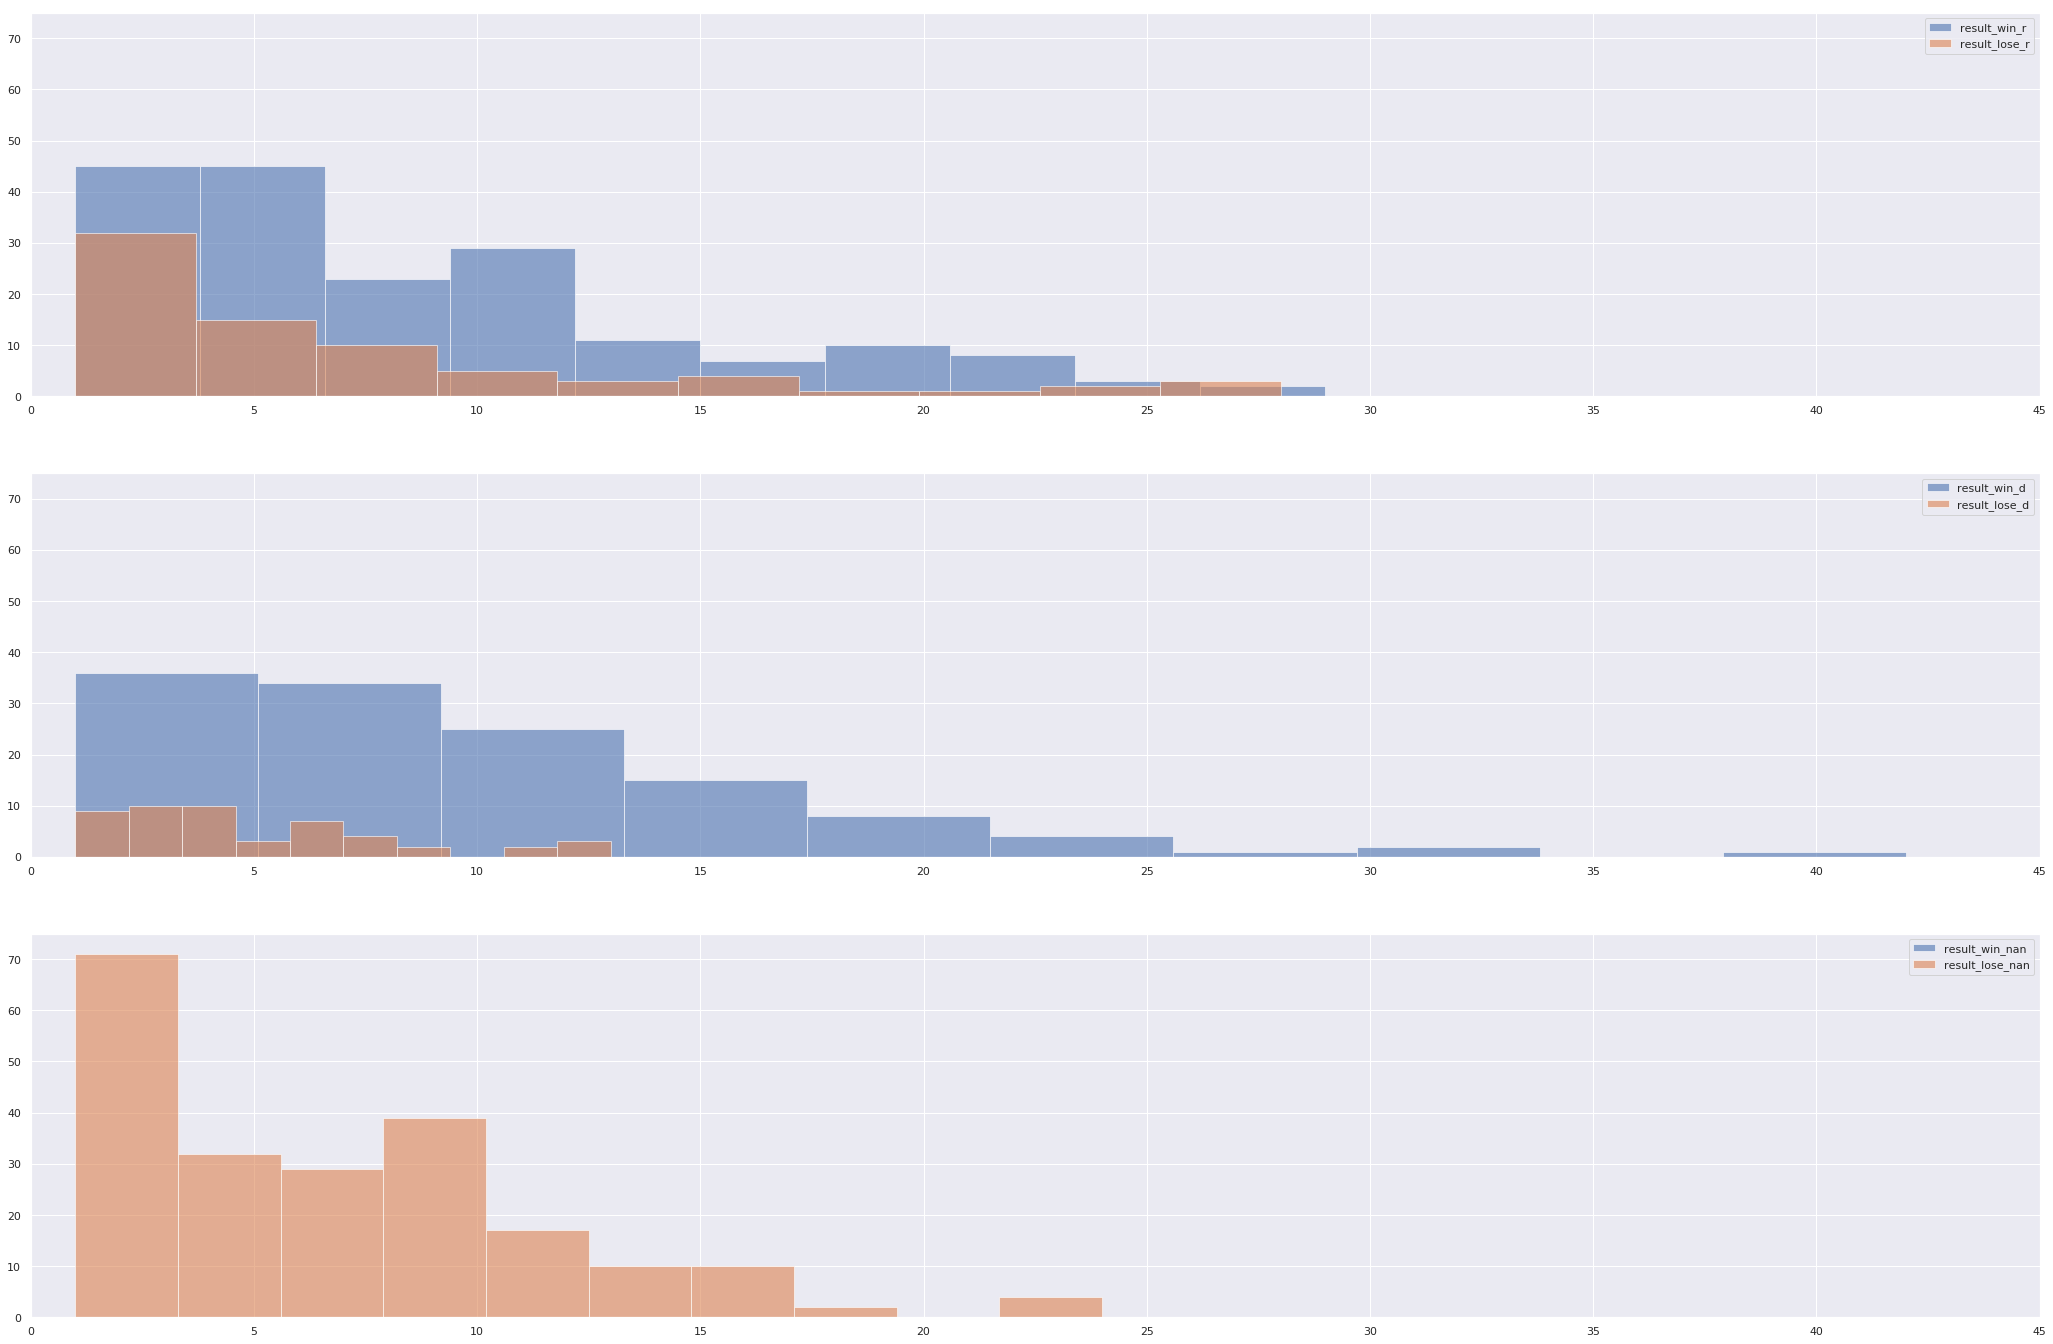

In [38]:
plt.figure(figsize=(36, 24))

plt.subplot(311)
plt.hist(result_win_r['poll_spread'], label='result_win_r', alpha=0.6) # republican led poll and won
plt.hist(result_lose_r['poll_spread'], label='result_lose_r', alpha=0.6) # republican lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 75)
plt.legend()

plt.subplot(312)
plt.hist(result_win_d['poll_spread'], label='result_win_d', alpha=0.6) # democrat led poll and won
plt.hist(result_lose_d['poll_spread'], label='result_lose_d', alpha=0.6) # democrat lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 75)
plt.legend()

plt.subplot(313)
plt.hist(result_win_nan['poll_spread'], label='result_win_nan', alpha=0.6)
plt.hist(result_lose_nan['poll_spread'], label='result_lose_nan', alpha=0.6)
plt.xlim(0, 45)
plt.ylim(0, 75)
plt.legend();


Fascinating. When the Democrats win (second graph), they are more likely to be leading the polls in convincing fashion (blue is spread when they are leading polls, while orange is spread when they are losing the polls). On the other hand, Republicans do not necessarily win in such convincing fashion (first graph; blue is spread when they are leading polls and win, orange is when they are losing polls and spread). We do have to be careful to jump too quickly to conclusions, however, as there are many missing values.

# Replication on Senate, Governor

In [43]:
senate_polls = pd.read_pickle(DATA_DIR/'cleaned'/'SenatePollwithWinner_Final.pkl')
governor_polls = pd.read_pickle(DATA_DIR/'cleaned'/'GovernorPollwithWinner_Final.pkl')

In [44]:
senate_win = senate_polls[senate_polls['poll_leader'] == senate_polls['winner']]
senate_lose = senate_polls[senate_polls['poll_leader'] != senate_polls['winner']]

governor_win = governor_polls[governor_polls['poll_leader'] == governor_polls['winner']]
governor_lose = governor_polls[governor_polls['poll_leader'] != governor_polls['winner']]

In [45]:
senate_win_r = senate_win[senate_win['winning_party'] == 'r'] # republican led poll and won
senate_win_d = senate_win[senate_win['winning_party'] == 'd'] # democrat led poll and won
senate_win_nan = senate_win[senate_win['winning_party'].isnull()]

senate_lose_r = senate_lose[senate_lose['winning_party'] == 'r'] # republican lost poll but won
senate_lose_d = senate_lose[senate_lose['winning_party'] == 'd'] # democrat lost poll but won
senate_lose_nan = senate_lose[senate_lose['winning_party'].isnull()]

In [46]:
governor_win_r = governor_win[governor_win['winning_party'] == 'r'] # republican led poll and won
governor_win_d = governor_win[governor_win['winning_party'] == 'd'] # democrat led poll and won
governor_win_nan = governor_win[governor_win['winning_party'].isnull()]

governor_lose_r = governor_lose[governor_lose['winning_party'] == 'r'] # republican lost poll but won
governor_lose_d = governor_lose[governor_lose['winning_party'] == 'd'] # democrat lost poll but won
governor_lose_nan = governor_lose[governor_lose['winning_party'].isnull()]

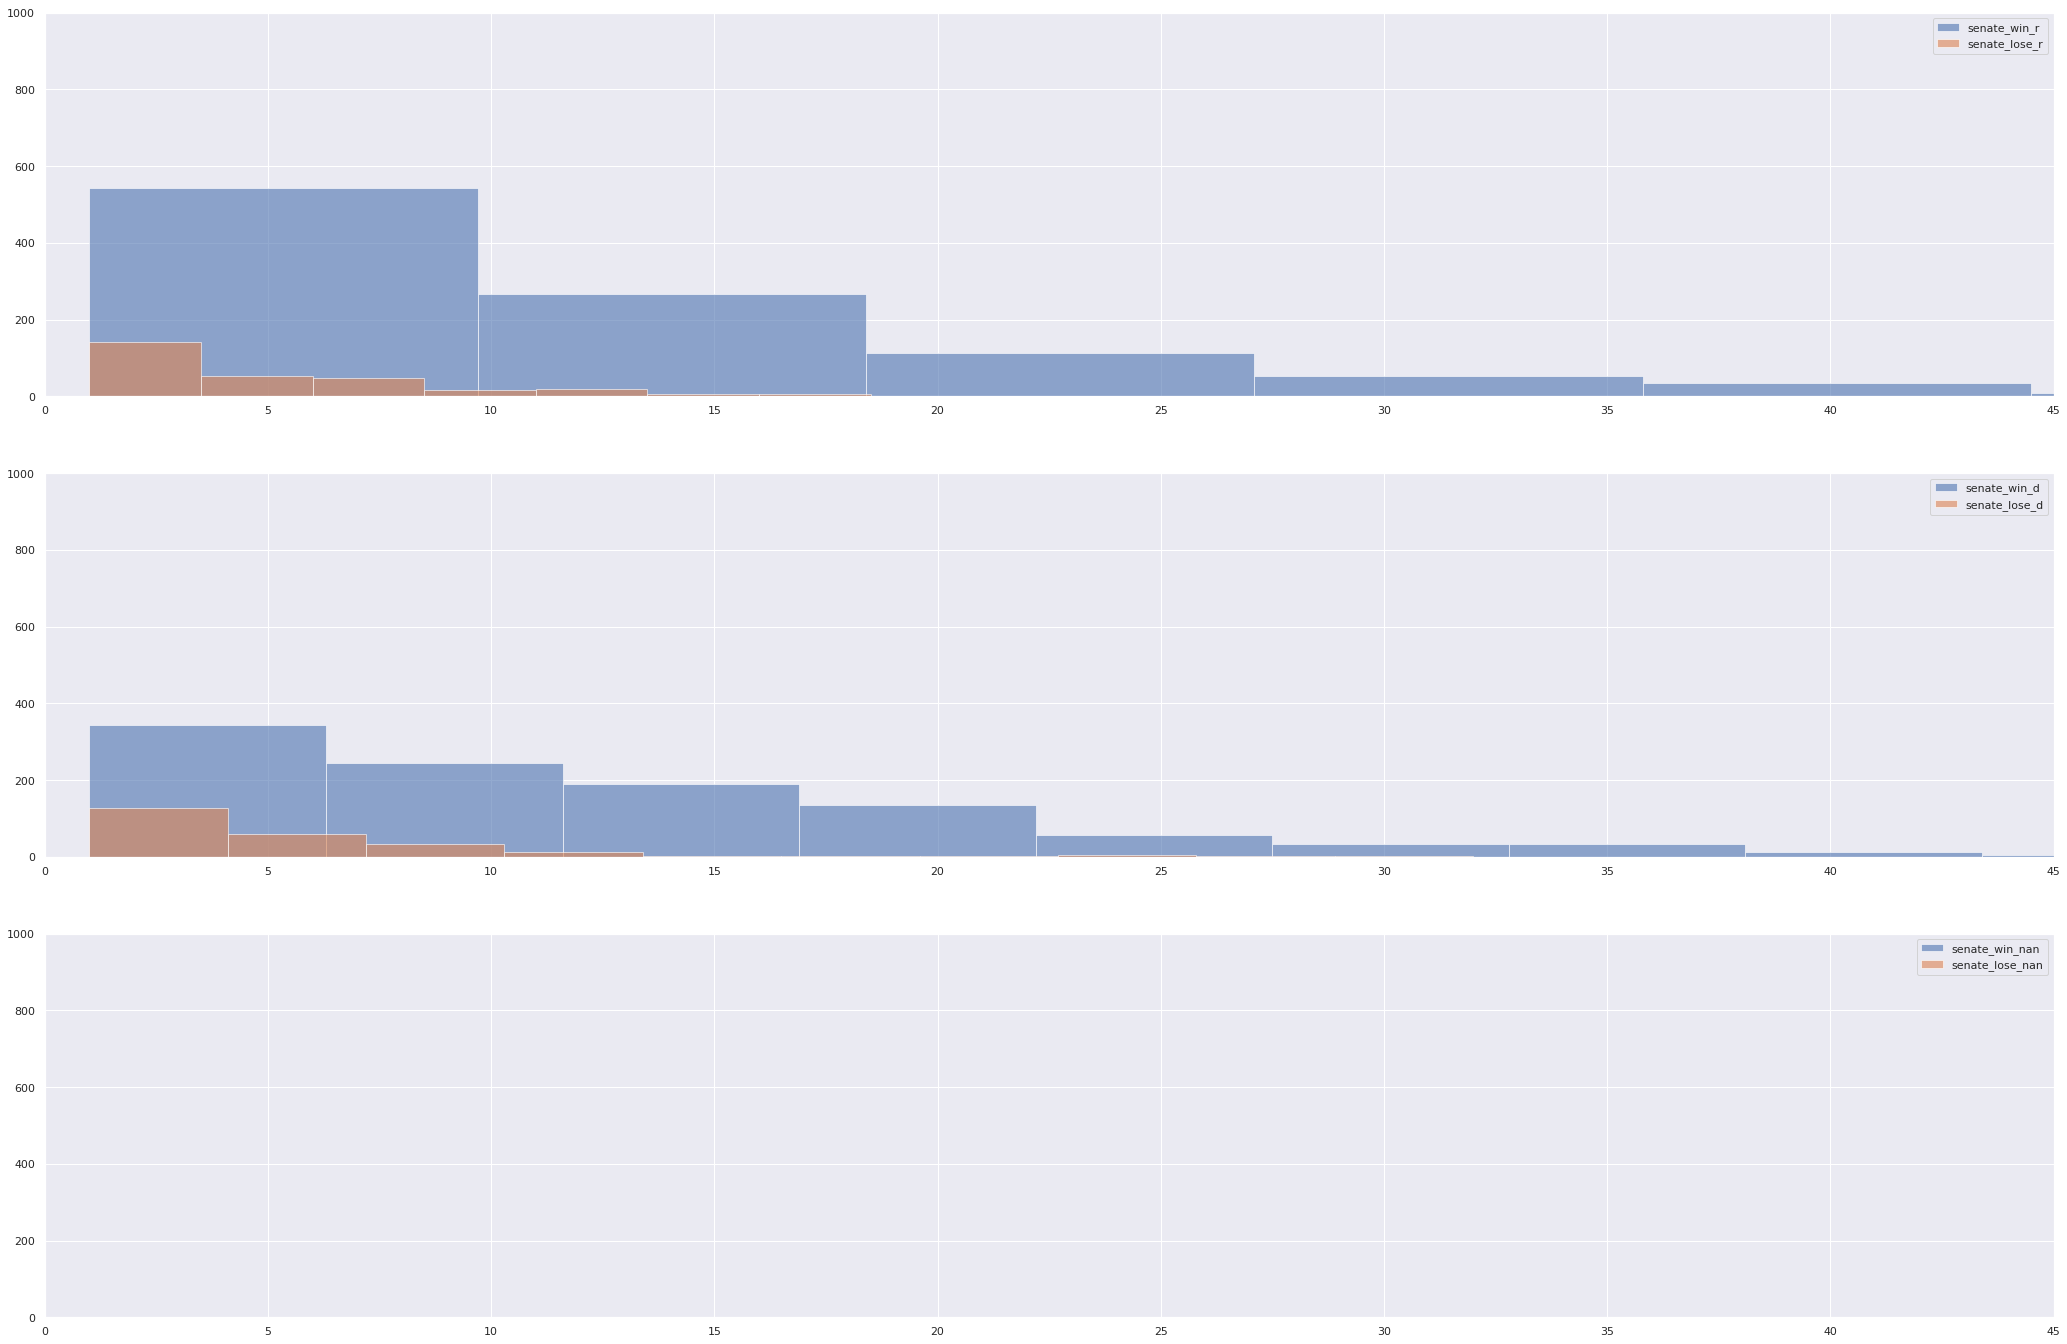

In [50]:
plt.figure(figsize=(36, 24))

plt.subplot(311)
plt.hist(senate_win_r['poll_spread'], label='senate_win_r', alpha=0.6) # republican led poll and won
plt.hist(senate_lose_r['poll_spread'], label='senate_lose_r', alpha=0.6) # republican lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(312)
plt.hist(senate_win_d['poll_spread'], label='senate_win_d', alpha=0.6) # democrat led poll and won
plt.hist(senate_lose_d['poll_spread'], label='senate_lose_d', alpha=0.6) # democrat lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(313)
plt.hist(senate_win_nan['poll_spread'], label='senate_win_nan', alpha=0.6)
plt.hist(senate_lose_nan['poll_spread'], label='senate_lose_nan', alpha=0.6)
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend();


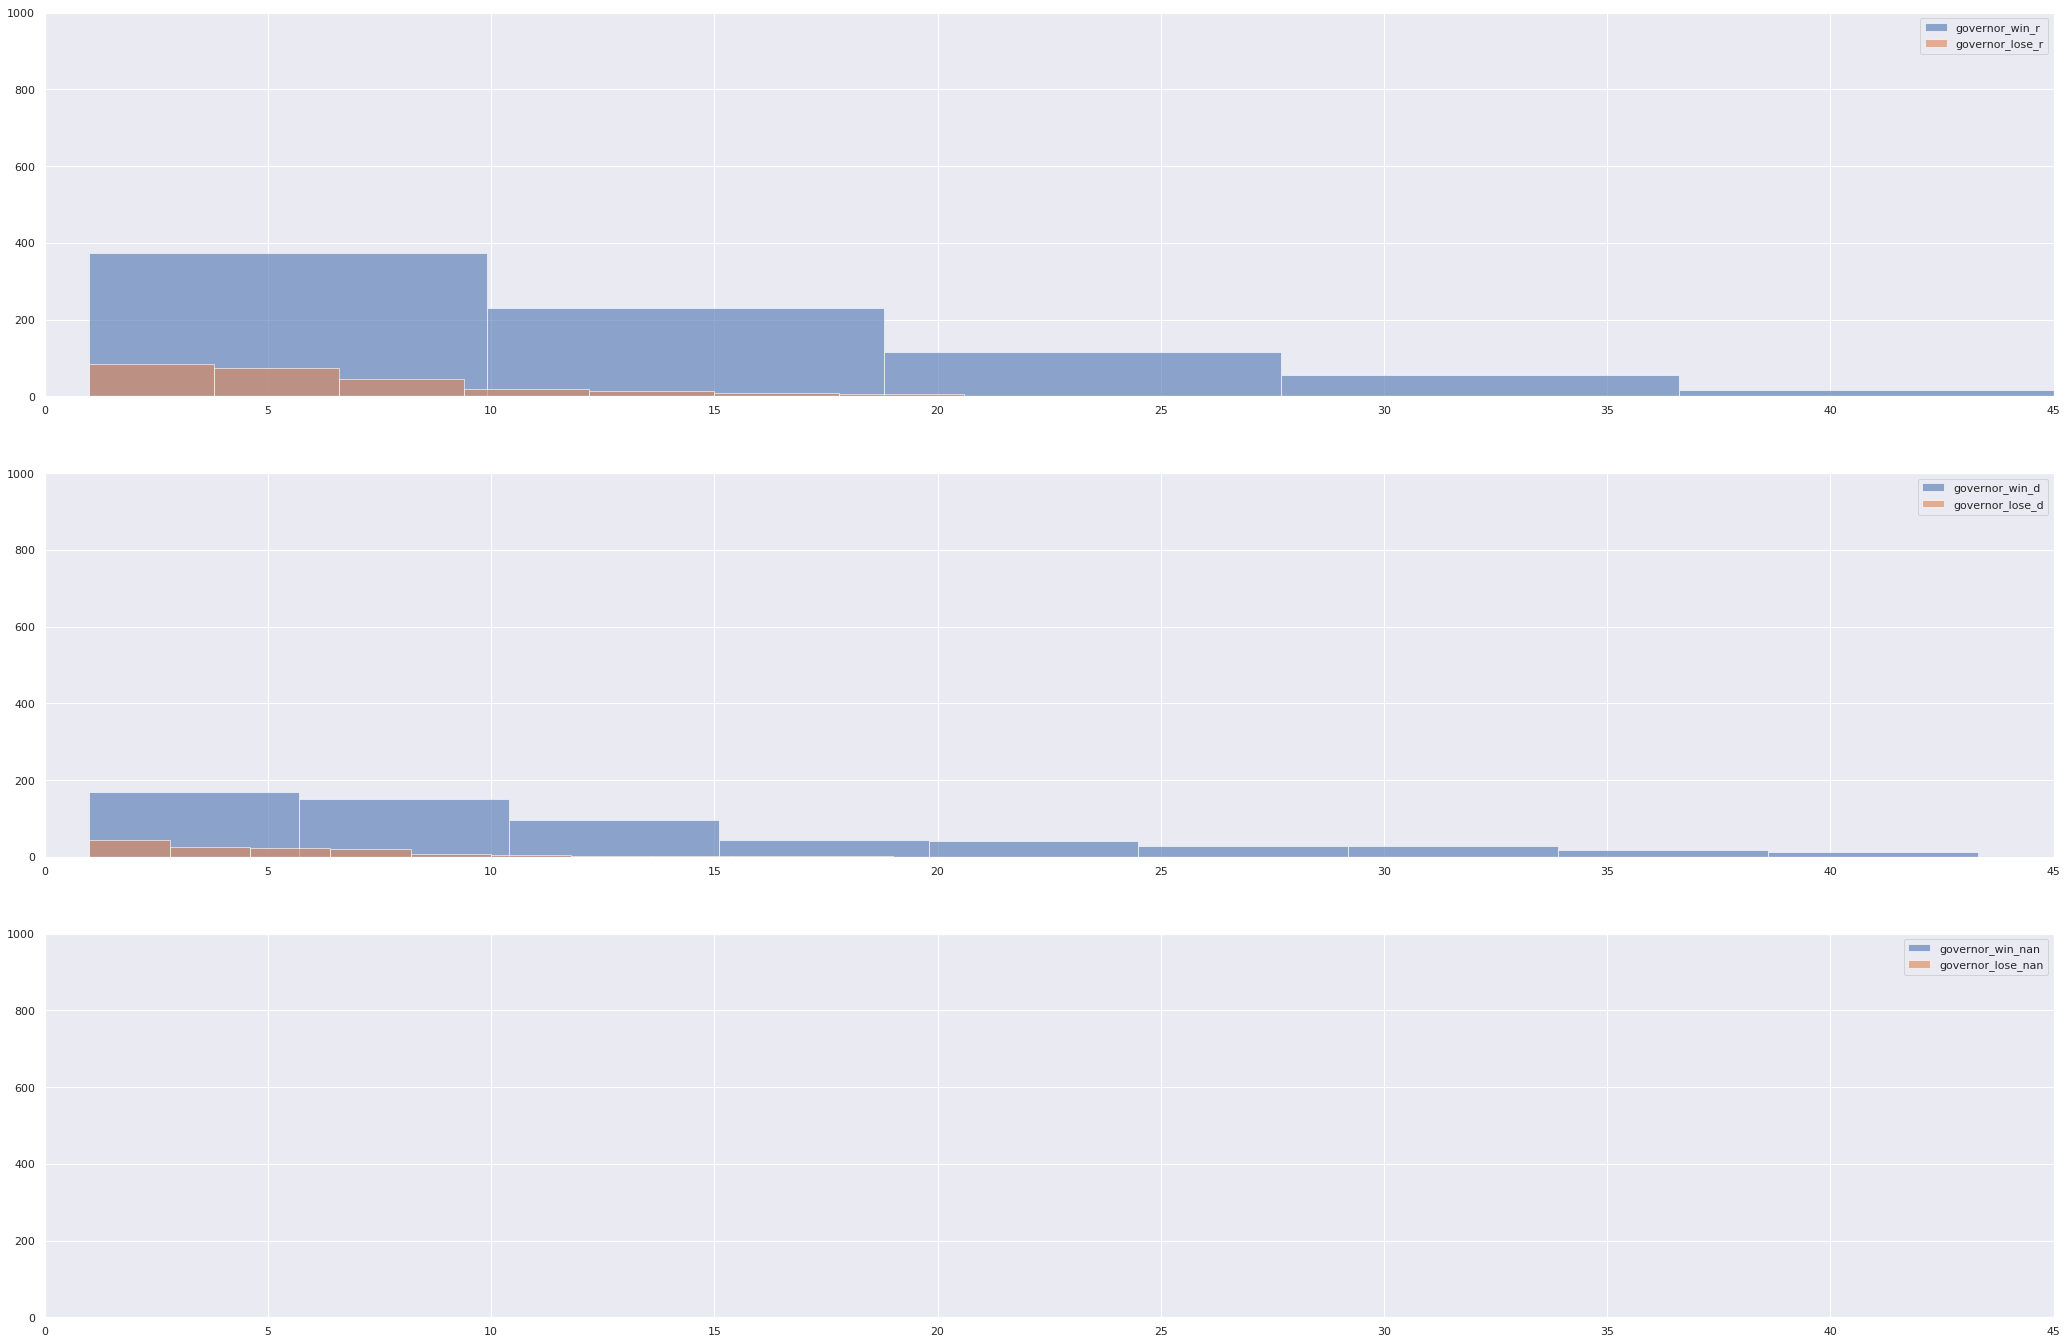

In [51]:
plt.figure(figsize=(36, 24))

plt.subplot(311)
plt.hist(governor_win_r['poll_spread'], label='governor_win_r', alpha=0.6) # republican led poll and won
plt.hist(governor_lose_r['poll_spread'], label='governor_lose_r', alpha=0.6) # republican lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(312)
plt.hist(governor_win_d['poll_spread'], label='governor_win_d', alpha=0.6) # democrat led poll and won
plt.hist(governor_lose_d['poll_spread'], label='governor_lose_d', alpha=0.6) # democrat lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(313)
plt.hist(governor_win_nan['poll_spread'], label='governor_win_nan', alpha=0.6)
plt.hist(governor_lose_nan['poll_spread'], label='governor_lose_nan', alpha=0.6)
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend();
